## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike dataset

In [156]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [333]:
bike = pd.read_csv("day.csv")

In [334]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [160]:
bike.columns.unique()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [161]:
bike.shape

(730, 16)

In [162]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [163]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [164]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###  Interpretation: The above means no Null values and hence no imputation required

### All the Variables are Numeric. The Target Variable to be predicted is the "count" variable - which is "Continuous" in nature. Hence this is a Regression scenario

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

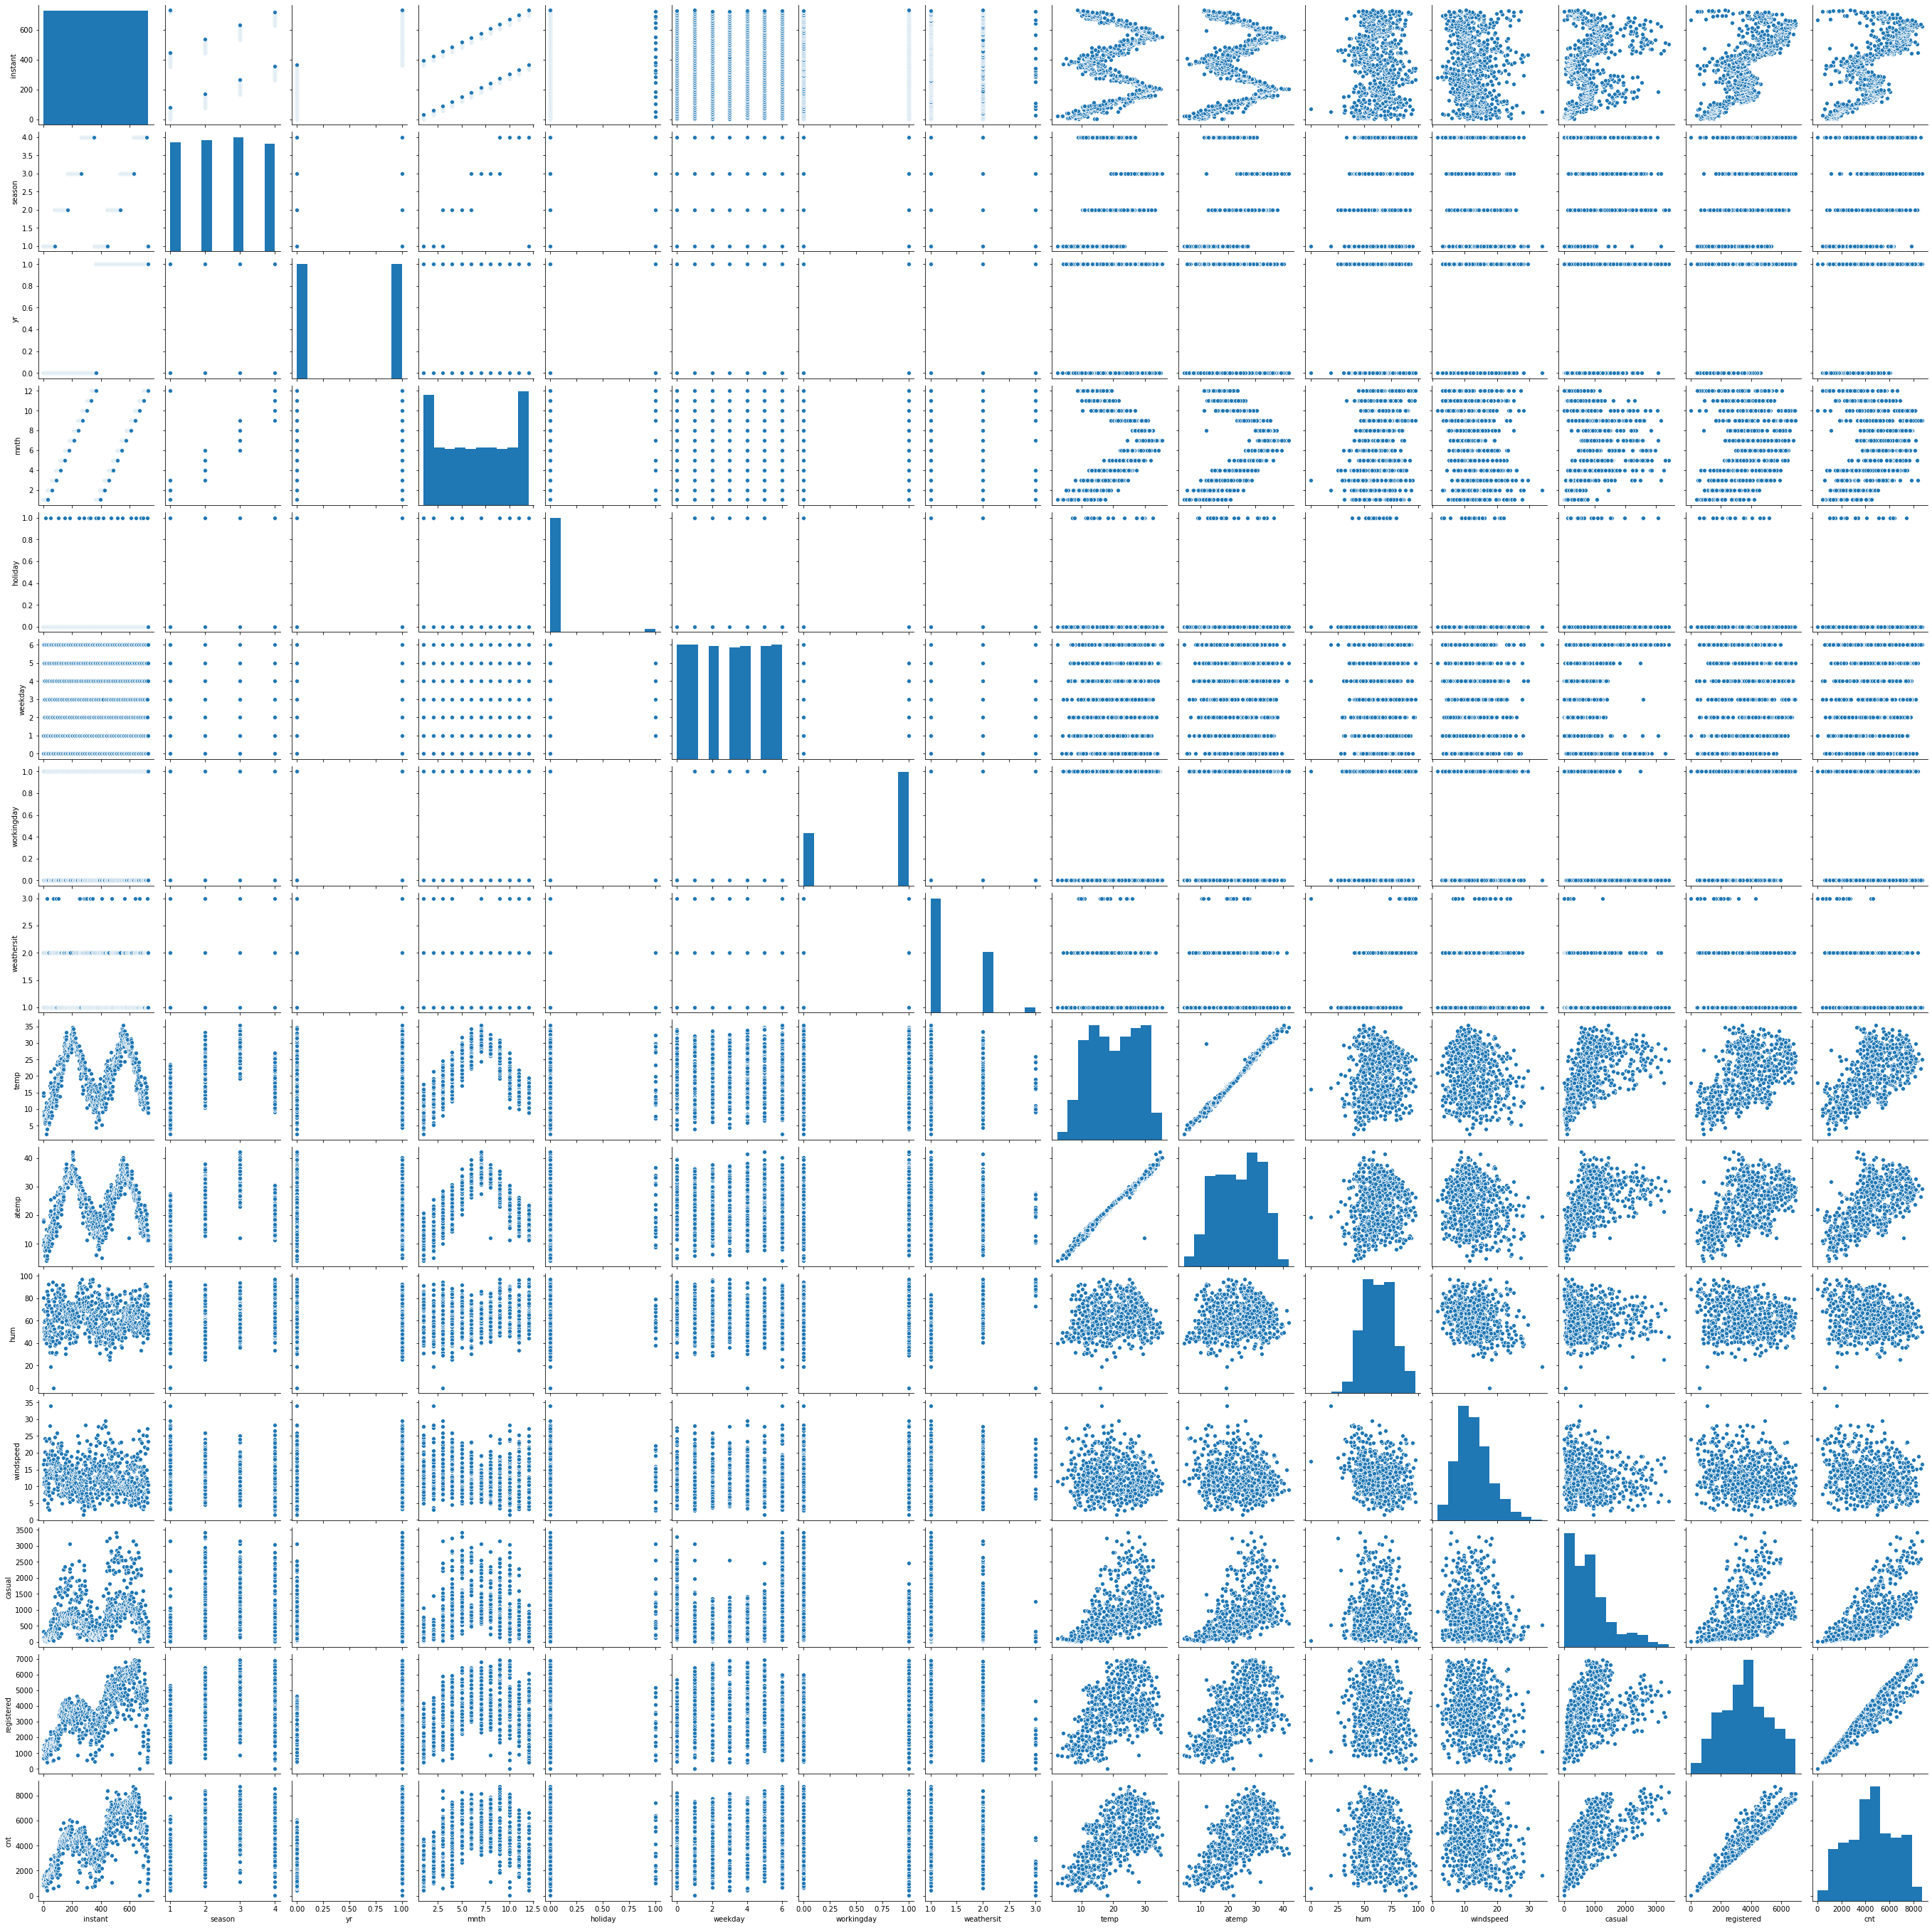

In [11]:
# visualise data using pairplot
sns.pairplot(bike)
plt.show()

#### Analysis : Looking at the above, though it's hard to see I zoomed into this and found some plots having a positive correlation with the count variable and hence Linear Regression is the way to go forward

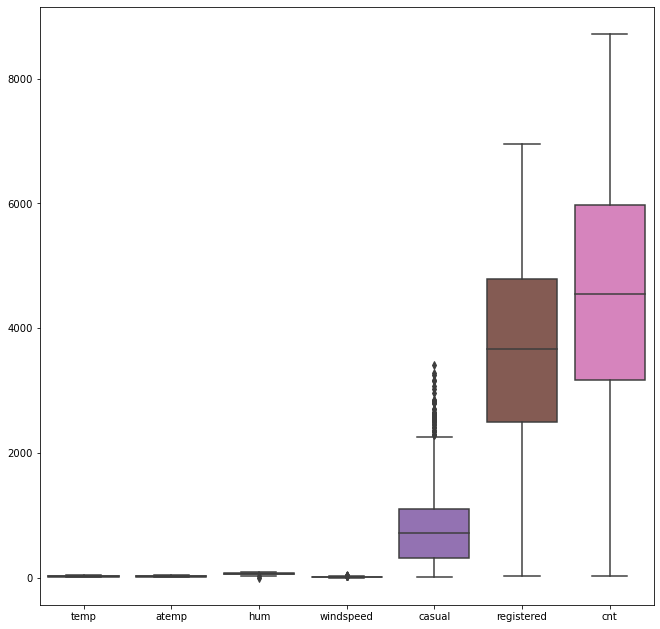

In [12]:
# just visualise 
sns.boxplot(data=bike[['temp','atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(11,11)

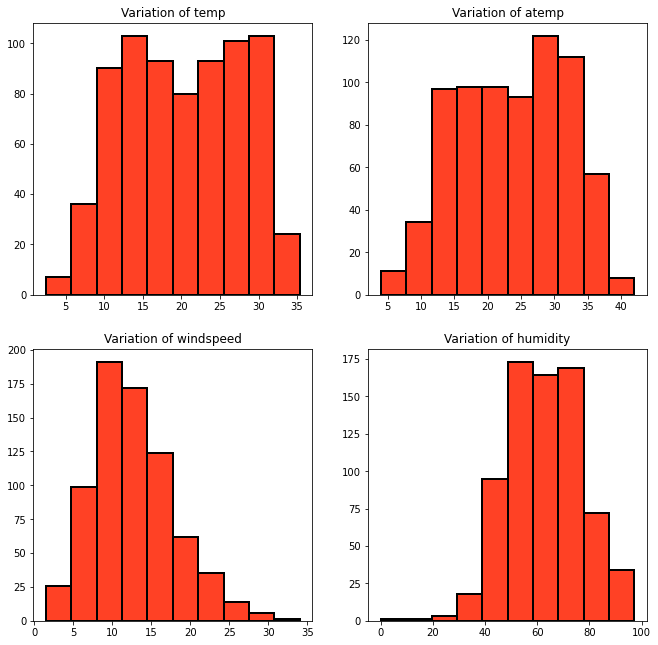

In [13]:
# all continuous variables - get a histogram to just visualise
bike.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=bike,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=bike,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=bike,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=bike,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(11,11)


In [14]:
# analyse season
bike.season.value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

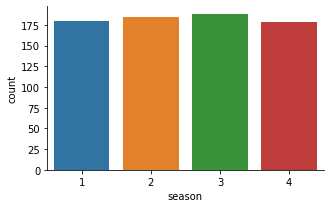

In [15]:
sns.factorplot(x='season',data=bike,kind='count',size=3,aspect=1.5)

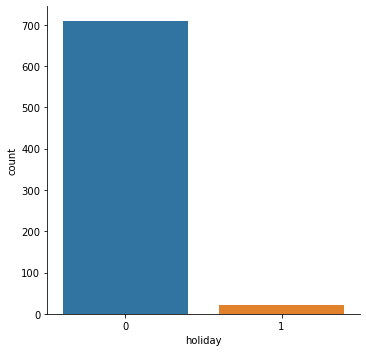

In [16]:
#holiday
bike.holiday.value_counts()
sns.factorplot(x='holiday',data=bike,kind='count',size=5,aspect=1) 

##### Majority of data is not on holidays

In [17]:
#season
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

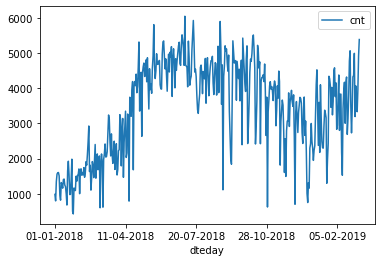

In [18]:
# visualise trend of 
bike[:24*18].plot(x='dteday', y='cnt')


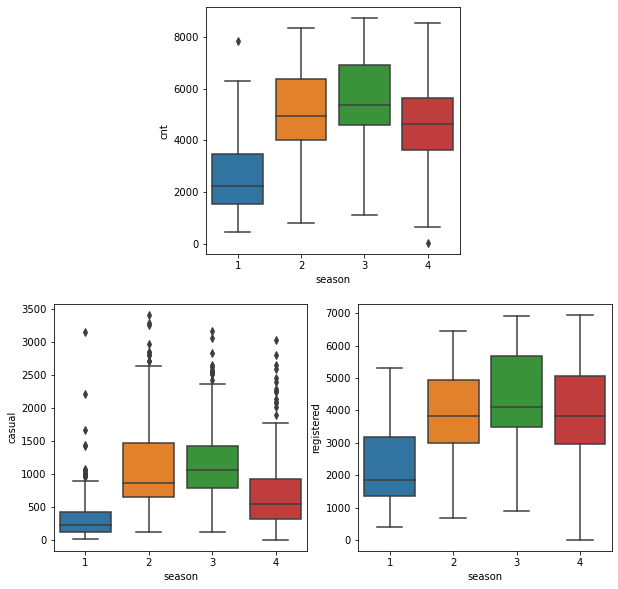

In [19]:
# season
# non-registered user: less rentals seen in spring & winter
# registered user: less rentals in spring
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='season', y='cnt', data=bike)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='season', y='casual', data=bike)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='season', y='registered', data=bike)
plt.show()

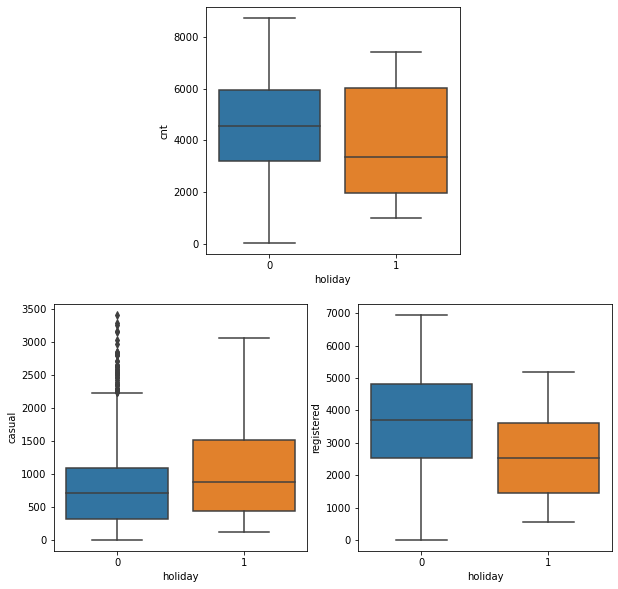

In [20]:
# holiday
# non-registered users: more rentals in holidays
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='holiday', y='cnt', data=bike)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='holiday', y='casual', data=bike)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='holiday', y='registered', data=bike)
plt.show()

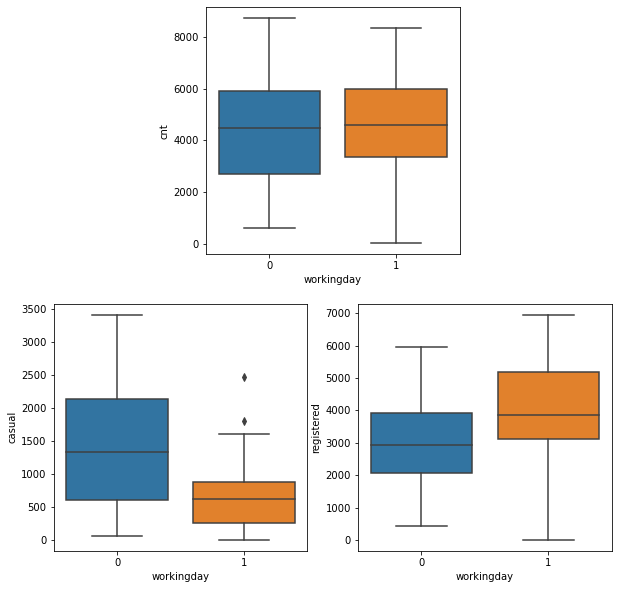

In [21]:
# workingday
# non-registered user: less rentals in workingday
# registered user: more rentals in workingday
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='workingday', y='cnt', data=bike)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='workingday', y='casual', data=bike)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='workingday', y='registered', data=bike)
plt.show()

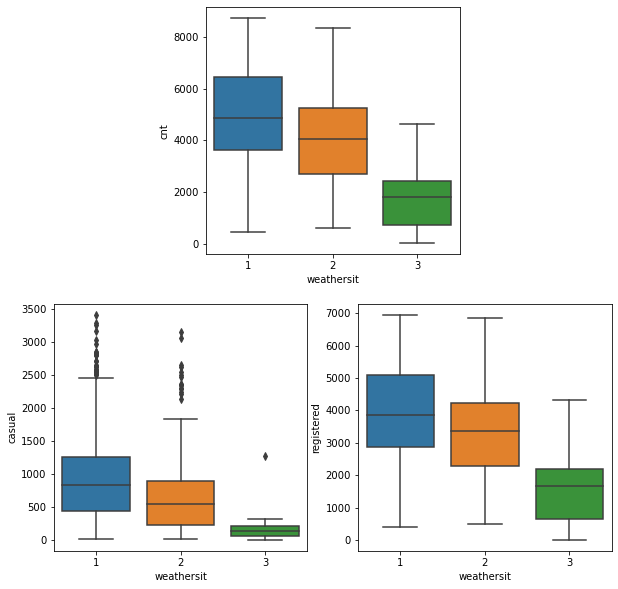

In [22]:
# weathersit
# more rentals in Category 1 == Clear, Few clouds, Partly cloudy, Partly cloudy
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='weathersit', y='cnt', data=bike)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='weathersit', y='casual', data=bike)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='weathersit', y='registered', data=bike)
plt.show()

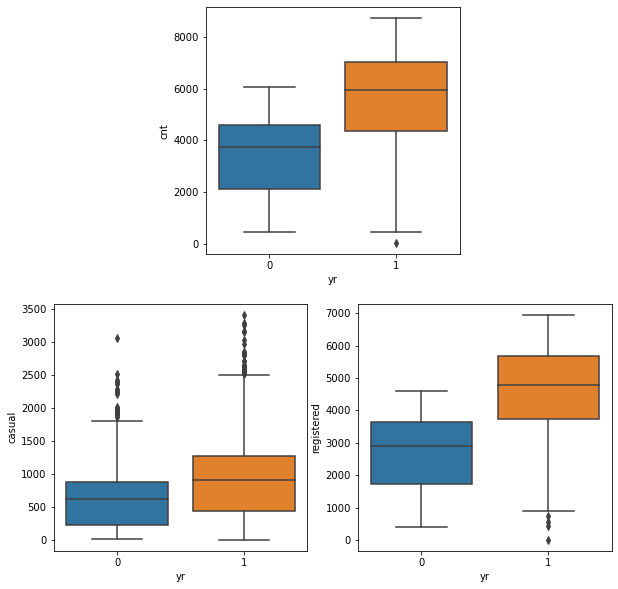

In [23]:
# year
# more rentals as time passes 0-2018, 1-2019
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='yr', y='cnt', data=bike)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='yr', y='casual', data=bike)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='yr', y='registered', data=bike)
plt.show()

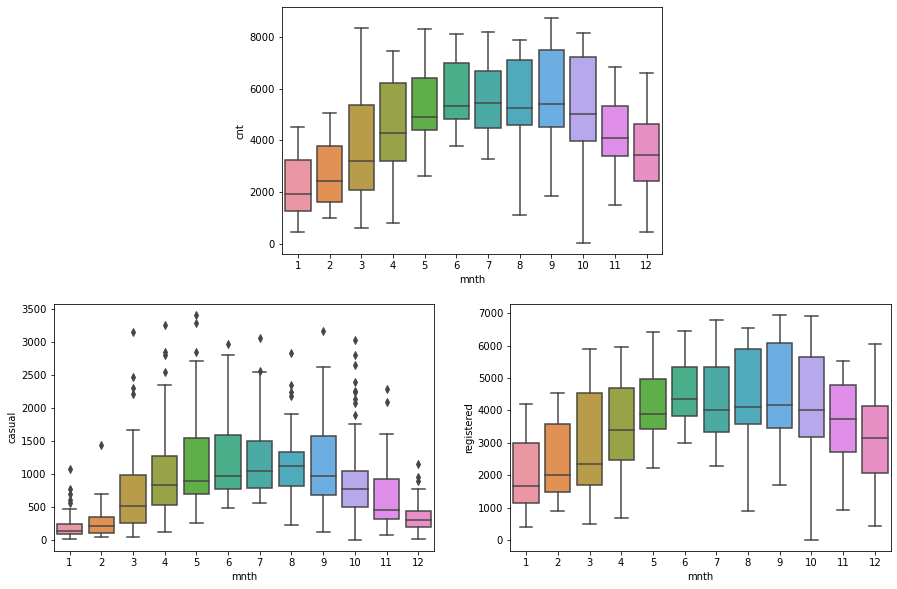

In [25]:
# month
# non-registered user: less rentals in spring & winter, more in summer & fall
# registered user: less rentals in spring
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='mnth', y='cnt', data=bike)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='mnth', y='casual', data=bike)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='mnth', y='registered', data=bike)
plt.show()


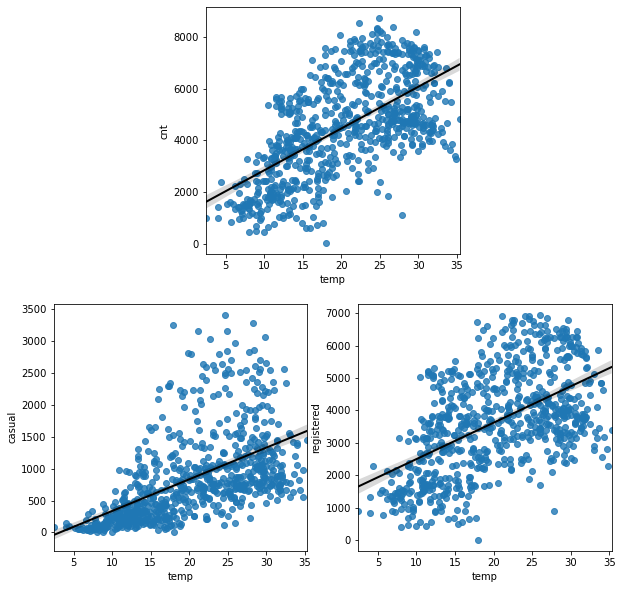

In [26]:
# temp
# higher temp -> more rentals
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='temp', y='cnt', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='temp', y='casual', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='temp', y='registered', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.show()

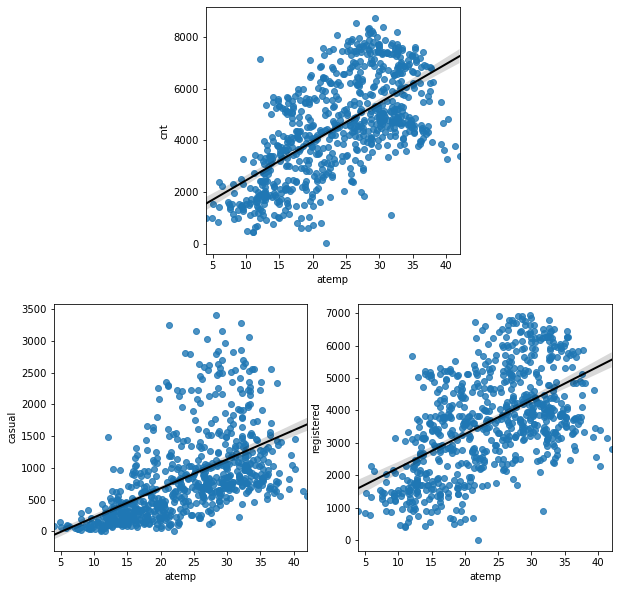

In [27]:
# atemp
# higher atemp -> more rentals
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='atemp', y='cnt', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='atemp', y='casual', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='atemp', y='registered', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.show()

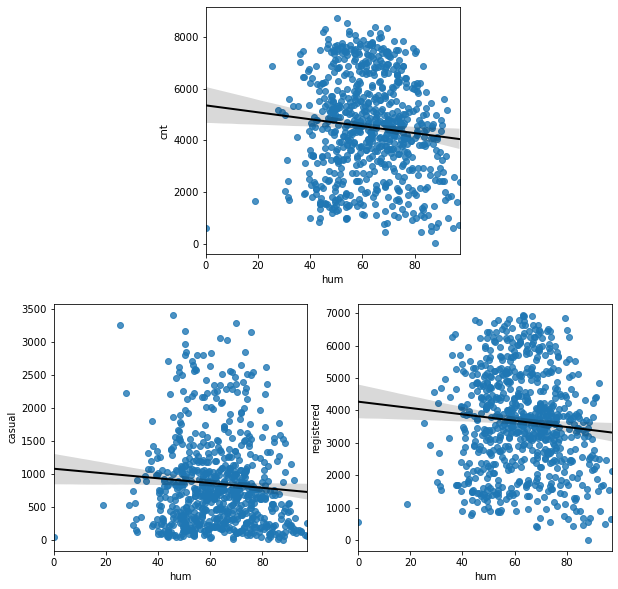

In [28]:
# humidity
# higher humidity -> less rentals
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='hum', y='cnt', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='hum', y='casual', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='hum', y='registered', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.show()

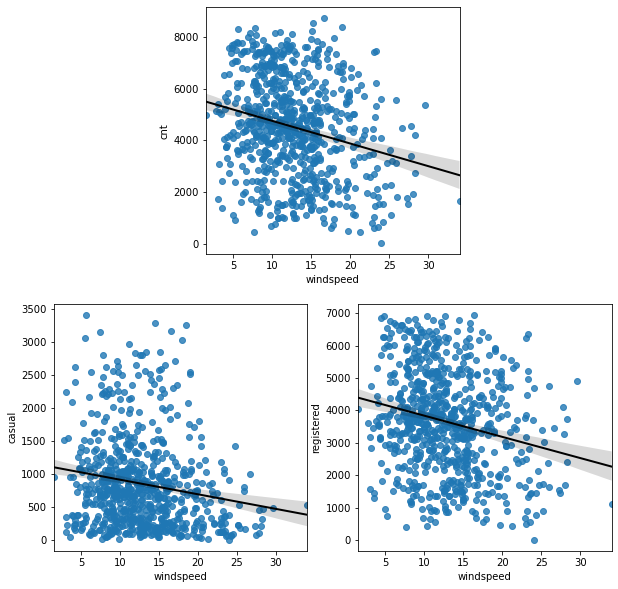

In [29]:
# windspeed
# no obvious relationship
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.regplot(x='windspeed', y='cnt', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='windspeed', y='casual', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='windspeed', y='registered', data=bike,
            line_kws={"color":"black", "linewidth":2})
plt.show()

In [39]:
# Converting the columns type to category

# bike['season'] = bike.season.astype('category')
# bike['mnth'] = bike.mnth.astype('category')
# bike['holiday'] = bike.holiday.astype('category')
# bike['weekday'] = bike.weekday.astype('category')
# bike['workingday'] = bike.workingday.astype('category')
# bike['weathersit'] = bike.weathersit.astype('category')
# bike['yr'] = bike.yr.astype('category')

# bike.dtypes

In [31]:
# bike['dteday'] = pd.to_datetime(bike['dteday'],yearfirst=True)

In [232]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Replace categorical variables with their category names first

In [335]:
# Start with season variable
varlist_1 =  ['season']

# Defining the map function
def season_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the bike list
bike[varlist_1] = bike[varlist_1].apply(season_map)

In [336]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [337]:
# month variable
varlist_2 =  ['mnth']

# Defining the map function
def month_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Applying the function to the bike list
bike[varlist_2] = bike[varlist_2].apply(month_map)

In [338]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [339]:
# weekday variable
varlist_3 =  ['weekday']

# Defining the map function
def weekday_map(x):
    return x.map({0: 'Sun',1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Applying the function to the bike list
bike[varlist_3] = bike[varlist_3].apply(weekday_map)

In [340]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [341]:
# weathersit variable
varlist_4 =  ['weathersit']

# Defining the map function
def weathersit_map(x):
    return x.map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'Light_Snow', 4: 'Heavy_Rain'})

# Applying the function to the bike list
bike[varlist_4] = bike[varlist_4].apply(weathersit_map)

In [342]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dummy Variables

In [343]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_d'
season_d = pd.get_dummies(bike['season'])

In [344]:
# Check what the dataset 'season_d' looks like
season_d.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [345]:
#Now, you don't need all columns. Drop the fall column
# Let's drop the first column using 'drop_first = True'

season_d = pd.get_dummies(bike['season'], drop_first = True)



In [346]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, season_d], axis = 1)

In [347]:
# Now let's see the head of our dataframe.

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [348]:
# Drop 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [349]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,0,Jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


#### month

In [350]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'month_d'
month_d = pd.get_dummies(bike['mnth'])

In [351]:
# Check what the dataset 'month_d' looks like
month_d.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [352]:
#Now, you don't need all columns. Drop the Apr column
# Let's drop the first column using 'drop_first = True'

month_d = pd.get_dummies(bike['mnth'], drop_first = True)



In [353]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, month_d], axis = 1)

In [355]:
bike.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,Jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [356]:
# Drop 'mnth' as we have created the dummies for it

bike.drop(['mnth'], axis = 1, inplace = True)

In [357]:
bike.head()

,instant,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,01-01-2018,0,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,0,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,0,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


#### weekday

In [358]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_d'
weekday_d = pd.get_dummies(bike['weekday'])

In [359]:
# Check what the dataset 'weekday_d' looks like
weekday_d.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [360]:
#Now, you don't need all columns. Drop the Fri column
# Let's drop the first column using 'drop_first = True'

weekday_d = pd.get_dummies(bike['weekday'], drop_first = True)


In [361]:
# Add the results to the original bike dataframe

bike = pd.concat([bike, weekday_d], axis = 1)

In [362]:
bike.head()

,instant,dteday,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,01-01-2018,0,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [363]:
# Drop 'weekday' as we have created the dummies for it

bike.drop(['weekday'], axis = 1, inplace = True)

In [364]:
bike.head()

,instant,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,1,01-01-2018,0,0,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,0,0,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,3,03-01-2018,0,0,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,5,05-01-2018,0,0,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


#### weathersit

In [365]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_d'
weathersit_d = pd.get_dummies(bike['weathersit'])

In [366]:
# Check what the dataset 'weathersit_d' looks like
weathersit_d.head()

,Clear_FewClouds,Light_Snow,Mist_Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [367]:
#Now, you don't need all columns. Drop the Clear_FewClouds column
# Let's drop the first column using 'drop_first = True'

weathersit_d = pd.get_dummies(bike['weathersit'], drop_first = True)


In [368]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, weathersit_d], axis = 1)

In [369]:
bike.head()

,instant,dteday,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
0,1,01-01-2018,0,0,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,0,0,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [370]:
# Drop 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [371]:
bike.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,1,0,0,0,0,1
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,1,0,0


In [379]:
# Drop the variables instant, dteday,atemp,casual & registered 
# instant = Index so not relevant 
# dteday = Date field will not provide any meaningful info for the target variable
# atemp is similar to temp as they're correlated to each other
# registered + casual = target variable hence drop both of these 
bike = bike.drop(["instant","dteday","atemp","casual","registered"], axis=1)


In [380]:
bike.info()

# reduced to 29 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   spring       730 non-null    uint8  
 8   summer       730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  Aug          730 non-null    uint8  
 11  Dec          730 non-null    uint8  
 12  Feb          730 non-null    uint8  
 13  Jan          730 non-null    uint8  
 14  Jul          730 non-null    uint8  
 15  Jun          730 non-null    uint8  
 16  Mar          730 non-null    uint8  
 17  May          730 non-null    uint8  
 18  Nov          730 non-null    uint8  
 19  Oct     

In [381]:
bike.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3: Data Preparation

### Split data into train and test split

In [382]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [383]:
print(df_train.shape)
print(df_test.shape)

# There is ~70% of train data and ~30% of test data

(510, 29)
(219, 29)


### Rescaling the features

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [384]:
# Instantiate an Object scaler
scaler = MinMaxScaler()

In [385]:
# create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [386]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [388]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


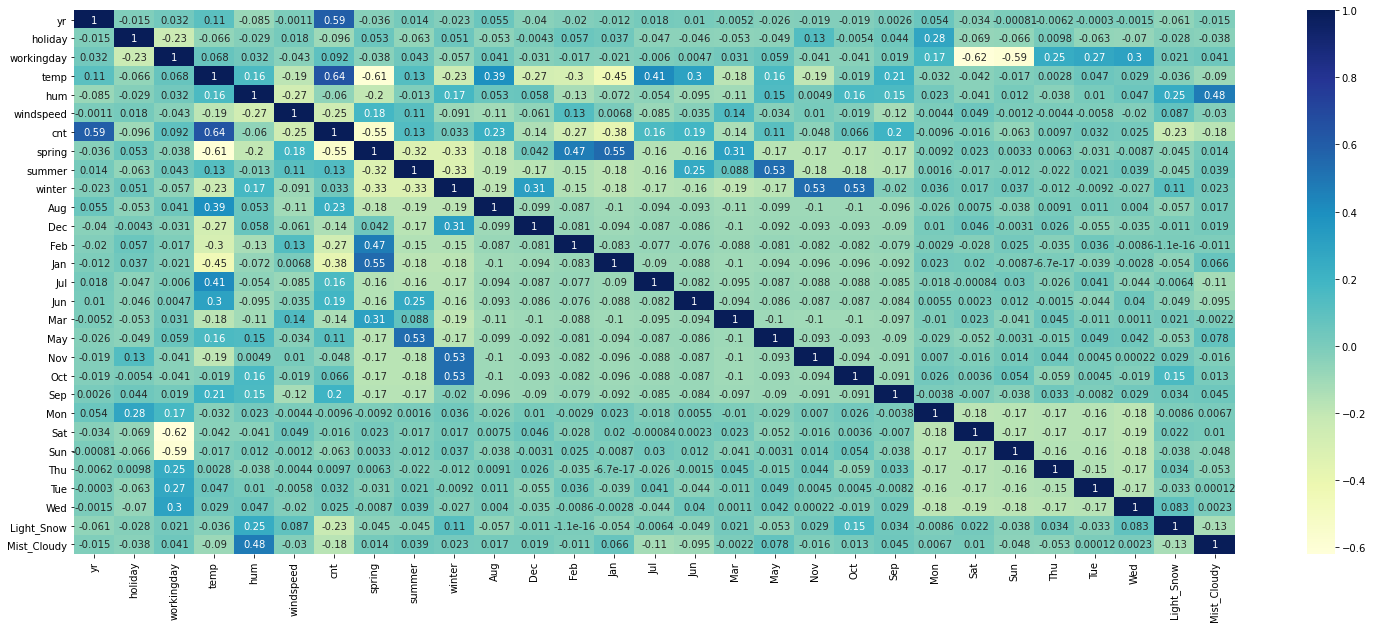

In [389]:
plt.figure(figsize = (26, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [390]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE
Recursive feature elimination

In [391]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [392]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [393]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1)]

In [394]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Light_Snow',
       'Mist_Cloudy'],
      dtype='object')

In [395]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [396]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [397]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [398]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [399]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          2.31e-191
Time:                        20:29:04   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2510      0.036      6.949      

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [400]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [401]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.58
21,Sat,19.72
22,Sun,18.35
6,spring,10.79
8,winter,9.50
7,summer,8.29
3,temp,7.12
17,Nov,6.80
18,Oct,6.59
9,Aug,6.43


### Dropping the variable and updating the model

 #### `Jan` for instance, has a high p-value. We should drop this variable 

In [402]:
X = X_train_rfe.drop(['Jan'], axis=1)

In [403]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [404]:
# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          1.13e-191
Time:                        20:29:17   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2394      0.036      6.696      

In [405]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.34
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.61
5,hum,1.91
3,workingday,1.88
12,Sat,1.78
14,Mist_Cloudy,1.57
10,Jul,1.49


### Dropping the variable and updating the model

 #### `holiday` for instance, has a high p-value. We should drop this variable 

In [406]:
X = X.drop(['holiday'], axis=1)

In [407]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [408]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          8.51e-192
Time:                        20:29:42   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2298      0.036      6.451      

In [409]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.13
6,spring,5.02
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,hum,1.91
2,workingday,1.65
11,Sat,1.64
13,Mist_Cloudy,1.57
9,Jul,1.49


### Dropping the variable and updating the model

 #### `spring` for instance, has a high VIF. We should drop this variable 

In [410]:
X = X.drop(['spring'], axis=1)

In [411]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [412]:
# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          2.26e-191
Time:                        20:29:51   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1705      0.028      5.991      

In [413]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.89
2,workingday,1.65
10,Sat,1.64
3,temp,1.60
12,Mist_Cloudy,1.56
8,Jul,1.43
6,summer,1.33
7,winter,1.29
11,Light_Snow,1.24


### Dropping the variable and updating the model

 #### `Jul` for instance, has a high p-value. We should drop this variable 

In [414]:
X = X.drop(['Jul'], axis=1)

In [415]:
# Build a fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [416]:
X_train_lm.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,Sep,Sat,Light_Snow,Mist_Cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,1


In [417]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Sat, 12 Sep 2020   Prob (F-statistic):          2.89e-191
Time:                        20:30:12   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1698      0.029      5.937      

In [418]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.12
4,hum,1.87
2,workingday,1.65
9,Sat,1.64
11,Mist_Cloudy,1.56
3,temp,1.27
7,winter,1.25
10,Light_Snow,1.24
6,summer,1.19
5,windspeed,1.18


### Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step XX: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [419]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

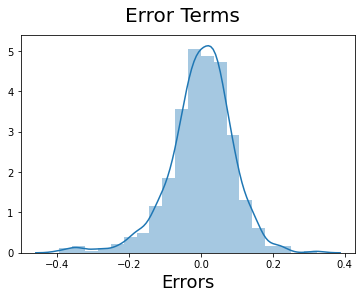

In [420]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step XXX: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [421]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [422]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [423]:
y_test = df_test.pop('cnt')
X_test = df_test

In [424]:
X_train_lm.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,Sep,Sat,Light_Snow,Mist_Cloudy
653,1.0,1,1,0.509887,0.575354,0.300794,0,1,0,0,0,0
576,1.0,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,1,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,1,0,1


In [323]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Sep', 'Sat', 'Light_Snow', 'Mist_Cloudy'],
      dtype='object')

In [425]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [430]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["holiday","spring","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Mon","Sun","Thu","Tue","Wed"], axis = 1)

In [432]:
X_test_m4.head()

,const,yr,workingday,temp,hum,windspeed,summer,winter,Sep,Sat,Light_Snow,Mist_Cloudy
184,1.0,0,0,0.831783,0.657364,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.610133,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,1,0,0,0,0,0


In [434]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

### Model evaluation

Text(0, 0.5, 'y_pred')

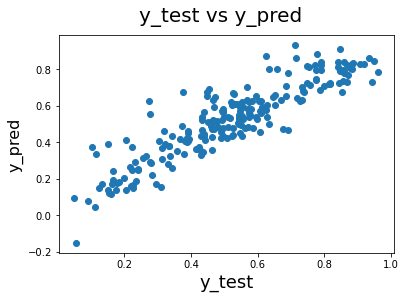

In [436]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ cnt = 0.229  \times  yr + 0.05  \times  workingday + 0.57 \times temp - 0.16 \times hum - 0.18 \times windspeed + 0.089 \times summer + 0.14 \times winter + 0.102 \times Sep + 0.06 \times Sat - 0.24 \times Light_Snow - 0.05 \times Mist_Cloudt $ $
